**Aquitetura**

nn.Sequential

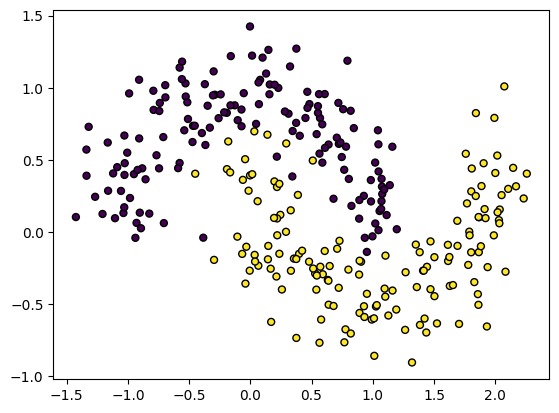

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X1, Y1 = make_moons(n_samples=300, noise = 0.2)
plt.scatter(X1[:,0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

In [2]:
import torch
from torch import nn #neural networks

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size,out_features=hidden_size),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden_size, out_features=output_size))

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [10]:
from torchsummary import summary
summary(net,input_size=(1,input_size ))

RuntimeError: Expected all tensors to be on the same device, but got mat1 is on cuda:0, different from other tensors on cpu (when checking argument in method wrapper_CUDA_addmm)

In [11]:
print(X1.dtype)
# Detect if CUDA (GPU) is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Convert numpy array to PyTorch tensor, change to float32, and move to device
tensor = torch.from_numpy(X1).float().to(device)
pred = net(tensor)
print(pred.size())

float64


RuntimeError: Expected all tensors to be on the same device, but got mat1 is on cuda:0, different from other tensors on cpu (when checking argument in method wrapper_CUDA_addmm)

In [5]:
class MinhaRede(nn.Module):
  def __init__(self):
    #Definir a arquitetura
    super(MinhaRede,self).__init__()
    self.hidden = nn.Linear(in_features=input_size,out_features=hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(in_features=hidden_size, out_features=output_size)

  def forward(self,x):
    #Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(x))
    output = self.output(hidden)
    return output

In [6]:
input_size = 2
hidden_size = 8
output_size = 1
net = MinhaRede(input_size,hidden_size,output_size)
print(net)

TypeError: MinhaRede.__init__() takes 1 positional argument but 4 were given

Subindo informações na GPU

In [7]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [8]:
input_size = 2
hidden_size = 8
output_size = 1
net = MinhaRede(input_size,hidden_size,output_size)
net = net.to(device)
print(net)

TypeError: MinhaRede.__init__() takes 1 positional argument but 4 were given

In [9]:
print(X1.dtype)
tensor = torch.from_numpy(X1)
tensor = tensor.to(device)
pred = net(tensor.float())
print(pred.size())

float64


RuntimeError: Expected all tensors to be on the same device, but got mat1 is on cuda:0, different from other tensors on cpu (when checking argument in method wrapper_CUDA_addmm)